# Analysis of Chikungunya in Jamaica

<font size="+.5">The first case of this mosquito- borne viral disease was confirmed July 2014. The disease is known mainly to be transmitted by the Aedes Aegypti breed of mosquitos and humans contract the disease once bitten by an infected female mosquito. The most commonly identified symptoms are fever and joint pain,although confirmed cases have reported rashes, headaches, nausea and fatigue. Between May 2014 and 2015, 5180 cases of 'Chik-V' were reported in Jamaica by the National Epidemiology Unit of the Ministry of Health. 
    
Presently, there have been no reported cases. Nonetheless my interest in analysing this publicly avaliable data arose with the recent increase of the mosquito population that has been attributed to work being on the sewage treatment plant near to my community, Harbour View. Complaints about the increased presence has been evident from the chorus of mosquito swatters that can be heard early mornings and late evenings. 
    
The response by local health authorities has been to schedule fogging of the community which has been helpful as the presence of mosquitoes has been noticeably decreased. The status of work being done on the sewage treatment plant, however, is uncertain as last reported rehabilitation and construction was in 2015.
    
The analysis of this publicly avaliable data will involve a visualization of cases across Jamaica. 
    

</font>





In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\650


In [2]:
os.chdir('C:/Users/650/Downloads')
cwd1 = os.getcwd()
print(cwd1)

C:\Users\650\Downloads


In [3]:
import numpy as np  
import pandas as pd

#### Importing dataset
The csv file was obtained from the Jamaica Open Data Portal: [Jamaica Open Data](https://www.data.gov.jm/)

In [4]:
csv_path="chikv_data.csv"

df=pd.read_csv(csv_path)
df.head()

,CODE,SEX,DATE OF ONSET,STATUS,STATIN/PIOJ COMMUNITIES,PARISH,Y,X,LATITUDE,LONGITUDE
0,Chik-483,F,14-09-10,Suspected,Lionel Town,Clarendon,629221.0323,725192.1672,17.812119,-77.233998
1,Chik-199,F,14-09-10,Suspected,Hayes,Clarendon,636641.1266,725891.7904,17.879168,-77.227485
2,Chik-440,F,14-09-17,Suspected,Grantham,Clarendon,667575.2023,708053.8595,18.158386,-77.396428
3,Chik-412,F,14-09-23,Suspected,Hayes,Clarendon,636641.1266,725891.7904,17.879168,-77.227485
4,Chik-287,F,14-09-24,Suspected,Hayes,Clarendon,636641.1266,725891.7904,17.879168,-77.227485


### Exploratory Data Analysis

#### Checking the data types

In [5]:
df.dtypes

CODE                        object
SEX                         object
DATE OF ONSET               object
STATUS                      object
STATIN/PIOJ COMMUNITIES     object
PARISH                      object
Y                          float64
X                          float64
LATITUDE                   float64
LONGITUDE                  float64
dtype: object

In [6]:
#Converting the 'DATE OF ONSET' column to a date format
df['DATE OF ONSET'] = pd.to_datetime(df['DATE OF ONSET'])
df.dtypes

CODE                               object
SEX                                object
DATE OF ONSET              datetime64[ns]
STATUS                             object
STATIN/PIOJ COMMUNITIES            object
PARISH                             object
Y                                 float64
X                                 float64
LATITUDE                          float64
LONGITUDE                         float64
dtype: object

In [7]:
#Checking consistency of categories in some of the 'object' data tyoe columns
print('Labels in STATUS column:', df['STATUS'].unique())
print('Labels in SEX column:', df['SEX'].unique())
print('Labels in PARISH column:', df['PARISH'].unique())

Labels in STATUS column: ['Suspected' 'Confirmed']
Labels in SEX column: ['F' 'M' nan 'm' 'f']
Labels in PARISH column: ['Clarendon' 'Hanover' 'Kingston' 'Manchester' 'Portland' 'Saint Andrew'
 'Saint Ann' 'Saint Catherine' 'Saint Elizabeth' 'Saint James'
 'Saint Mary' 'Saint Thomas' 'Trelawny' 'Westmoreland']


####  All 14 parishes are accounted for, however, we observe the presence of 'nan' and inconsistent labels for sex. Some data preparation will be required.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CODE                     1343 non-null   object        
 1   SEX                      1340 non-null   object        
 2   DATE OF ONSET            1343 non-null   datetime64[ns]
 3   STATUS                   1343 non-null   object        
 4   STATIN/PIOJ COMMUNITIES  1343 non-null   object        
 5   PARISH                   1343 non-null   object        
 6   Y                        1343 non-null   float64       
 7   X                        1343 non-null   float64       
 8   LATITUDE                 1343 non-null   float64       
 9   LONGITUDE                1343 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 105.0+ KB


In [9]:
#Three missing values are observed 
df.isnull().sum()

CODE                       0
SEX                        3
DATE OF ONSET              0
STATUS                     0
STATIN/PIOJ COMMUNITIES    0
PARISH                     0
Y                          0
X                          0
LATITUDE                   0
LONGITUDE                  0
dtype: int64

In [15]:
#Removing missing rows and re-checking
df=df.dropna(axis=0)
df.isnull().sum()

CODE                       0
SEX                        0
DATE OF ONSET              0
STATUS                     0
STATIN/PIOJ COMMUNITIES    0
PARISH                     0
Y                          0
X                          0
LATITUDE                   0
LONGITUDE                  0
dtype: int64

In [10]:
df.shape

(1343, 10)

####  Now that missing values has been resolved, formating the labels for SEX

In [11]:
df['SEX'].replace('m','M',inplace=True)
df['SEX'].replace('f','F',inplace=True)
df.SEX.unique()

array(['F', 'M', nan], dtype=object)

#### Having prepared the data, the analysis can resume

In [12]:
#Number of case counts by status
case_counts=df['STATUS'].value_counts().to_frame()
case_counts.rename(columns={'STATUS':'Number of Cases'},inplace=True)
case_counts

,Number of Cases
Suspected,1304
Confirmed,39


#### Most of the reported cases are suspected. This distribution can be futher explored based on sex and parish

In [13]:
df1=df.value_counts().groupby(['SEX','STATUS'],as_index=True).sum()
df1

SEX  STATUS   
F    Confirmed     26
     Suspected    843
M    Confirmed     13
     Suspected    458
dtype: int64

In [28]:
df2=df.value_counts().groupby(['SEX'],as_index=True).sum()
df2

SEX
F    869
M    471
dtype: int64

In [14]:
df.value_counts().groupby(['SEX','STATUS','PARISH'],as_index=True).sum()

SEX  STATUS     PARISH         
F    Confirmed  Kingston             3
                Portland             1
                Saint Andrew        10
                Saint Ann            1
                Saint Catherine      3
                Saint Mary           1
                Saint Thomas         7
     Suspected  Clarendon            5
                Hanover             70
                Kingston            26
                Manchester          15
                Portland             7
                Saint Andrew       114
                Saint Ann           38
                Saint Catherine    114
                Saint Elizabeth     77
                Saint James        204
                Saint Mary          24
                Saint Thomas        21
                Trelawny            83
                Westmoreland        45
M    Confirmed  Portland             1
                Saint Andrew         6
                Saint Ann            3
                Saint Catherine 

#### Visualizing some of these results

In [15]:
import matplotlib.pyplot as plt

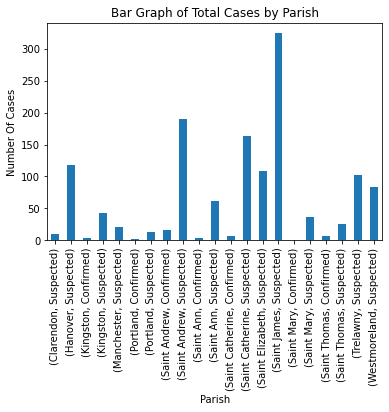

In [16]:
cases_by_parish = df.value_counts().groupby(['PARISH','STATUS'],as_index=True).sum()

cases_by_parish.plot(kind='bar')

plt.xlabel('Parish')
plt.ylabel('Number Of Cases')
plt.title('Bar Graph of Total Cases by Parish')

plt.show()

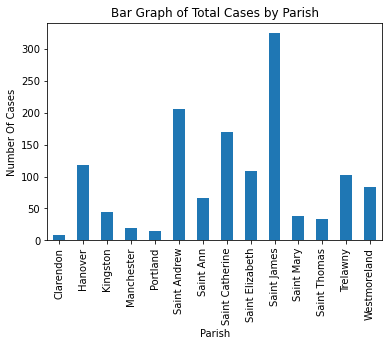

In [17]:
cases_by_parish = df.value_counts().groupby(['PARISH'],as_index=True).sum()

cases_by_parish.plot(kind='bar')

plt.xlabel('Parish')
plt.ylabel('Number Of Cases')
plt.title('Bar Graph of Total Cases by Parish')

plt.show()

#### Though bar graphs can be useful visualizations, given the nature of the data, the visualization of cases would be better served using a geospatial map of the cases showing their distribution across the island.

In [18]:
#Package used to visualize geospatial data
import folium

#### Highlighting coordinates of Jamaica to display on the World Map

In [19]:
jamaica_latitude = 18.109581
jamaica_longitude = -77.297508

jamaica_map = folium.Map(location=[jamaica_latitude, jamaica_longitude],zoom_start=9)

# display world map
jamaica_map

#### Below is an interactive map showcasing the distibution of cases across the island and the status of each case.

In [20]:
from folium import plugins

# instantiate a mark cluster object for the cases in the dataframe
chikv_cases = plugins.MarkerCluster().add_to(jamaica_map)

# loop through the cases and add each data point to the mark cluster
for lat, lng, label, in zip(df.LATITUDE, df.LONGITUDE, df.STATUS):
    folium.Marker(
        location=[lat, lng],
        popup=label,
    ).add_to(chikv_cases)

# display map
jamaica_map